<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ID" data-toc-modified-id="ID-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ID</a></span><ul class="toc-item"><li><span><a href="#ID-Duplicates-Conclusion" data-toc-modified-id="ID-Duplicates-Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ID Duplicates Conclusion</a></span></li></ul></li><li><span><a href="#Waterfront" data-toc-modified-id="Waterfront-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Waterfront</a></span><ul class="toc-item"><li><span><a href="#Pandas-isna()-vs-isnull()---accomplish-same-thing" data-toc-modified-id="Pandas-isna()-vs-isnull()---accomplish-same-thing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pandas isna() vs isnull() - accomplish same thing</a></span></li></ul></li><li><span><a href="#sqft_basement" data-toc-modified-id="sqft_basement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>sqft_basement</a></span><ul class="toc-item"><li><span><a href="#Result" data-toc-modified-id="Result-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Tiers-of-basement-size-using-Numpy.select()" data-toc-modified-id="Tiers-of-basement-size-using-Numpy.select()-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tiers of basement size using Numpy.select()</a></span></li><li><span><a href="#Column-for-basement/no_basement-using-Numpy.where()" data-toc-modified-id="Column-for-basement/no_basement-using-Numpy.where()-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Column for basement/no_basement using Numpy.where()</a></span></li></ul></li><li><span><a href="#Floors" data-toc-modified-id="Floors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Floors</a></span><ul class="toc-item"><li><span><a href="#Half-floors" data-toc-modified-id="Half-floors-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Half floors</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Yr_renovated" data-toc-modified-id="Yr_renovated-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Yr_renovated</a></span></li><li><span><a href="#Nulls-get-bundled-with-values" data-toc-modified-id="Nulls-get-bundled-with-values-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Nulls get bundled with values</a></span></li><li><span><a href="#The-3842-nulls-get-switched-to-'not-0'" data-toc-modified-id="The-3842-nulls-get-switched-to-'not-0'-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>The 3842 nulls get switched to 'not 0'</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Result</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn import datasets

In [2]:
%store -r kc_df

In [3]:
df = kc_df.copy()

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# ID
Duplicates?

In [6]:
# Duplicate ids, but are they truly the same event?

print("There are {} duplicated ids in this dataset.".format(df.id.duplicated().sum()))

There are 177 duplicated ids in this dataset.


In [7]:
duplicate_id = df[df.id.duplicated(keep=False)]
duplicate_date = df[df.date.duplicated(keep=False)]

# From my capstone project
# duplicates.sort_values(by=['Coffee Name']).head()
# df.drop_duplicates(inplace=True)

temp = df[['id','date']]
duplicates = temp[temp.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, date]
Index: []


## ID Duplicates Conclusion
I believe that there aren't any duplicate entries, just houses that were sold/resold 

# Waterfront

In [8]:
# .value_counts() excludes null
print("Value counts for waterfront: \n{}".format(df.waterfront.value_counts()))
print("\nTotal waterfront values: {}".format(len(df.waterfront)))

Value counts for waterfront: 
0.0    19075
1.0      146
Name: waterfront, dtype: int64

Total waterfront values: 21597


## Pandas isna() vs isnull() - accomplish same thing

In [9]:
print("Null waterfront values: {}".format(df.waterfront.isna().sum()))
print(df.waterfront.isna().sum() / len(df.waterfront)) #10% of waterfront data missing

Null waterfront values: 2376
0.11001527989998611


In [10]:
# one .sum() gives the breakout of nulls, a double .sum() gives the total of whole dataframe
df.isna().sum().sum()

6281

In [11]:
df.waterfront.isnull().sum()

2376

In [12]:
# drop null
df.waterfront.dropna(inplace=True)

In [13]:
df.waterfront.isna().sum()

0

In [14]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

# sqft_basement

In [15]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
556.0         1
1008.0        1
417.0         1
2610.0        1
295.0         1
2850.0        1
1816.0        1
588.0         1
602.0         1
2190.0        1
1525.0        1
1245.0        1
2810.0        1
4820.0        1
143.0         1
1920.0        1
283.0         1
2570.0        1
875.0         1
2130.0        1
2050.0        1
1481.0        1
415.0         1
2580.0        1
1913.0        1
518.0         1
2300.0        1
3260.0        1
906.0         1
1990.0        1
Name: sqft_basement, Len

In [16]:
df.sqft_basement.min()

'0.0'

In [17]:
df.sqft_basement.max()

'?'

In [18]:
df.sqft_basement.isna().sum()

0

In [19]:
# About half of the houses have no basement.

df.sqft_basement.value_counts().sort_values(ascending=False)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
225.0         1
652.0         1
1852.0        1
276.0         1
666.0         1
274.0         1
506.0         1
792.0         1
374.0         1
2490.0        1
2360.0        1
1275.0        1
1281.0        1
3000.0        1
2390.0        1
2730.0        1
704.0         1
1248.0        1
935.0         1
915.0         1
243.0         1
2250.0        1
20.0          1
176.0         1
1960.0        1
2600.0        1
3500.0        1
768.0         1
1024.0        1
1990.0        1
Name: sqft_basement, Len

In [20]:
# sqft_living = sqft_above + sqft_basement, is this true
temp = df[['sqft_living','sqft_above','sqft_basement']]

In [21]:
temp.head(3)

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0


In [22]:
temp.sqft_living.isna().sum()

0

In [23]:
temp.sqft_above.isna().sum()

0

In [24]:
temp.sqft_basement.isna().sum()

0

In [25]:
# This is a check of above's value

len(temp[temp['sqft_basement'] == '?'])

454

In [26]:
# create a new column calc_below and compare it to sqft_basement for the ? values
temp['calc_basement'] = temp['sqft_living'] - temp['sqft_above']

In [27]:
temp.head()

,sqft_living,sqft_above,sqft_basement,calc_basement
0,1180,1180,0.0,0
1,2570,2170,400.0,400
2,770,770,0.0,0
3,1960,1050,910.0,910
4,1680,1680,0.0,0


In [28]:
temp[temp['sqft_basement'] == '?']

,sqft_living,sqft_above,sqft_basement,calc_basement
6,1715,1715,?,0
18,1200,1200,?,0
42,3595,3595,?,0
79,3450,3450,?,0
112,1540,1160,?,380
115,4380,2780,?,1600
217,2250,2250,?,0
309,3320,2220,?,1100
384,4800,3480,?,1320
508,1540,820,?,720


## Result

It appears on visual inspection, that the sqft_basement values that were ? can be reassigned as the calcualated value of all living space minus the living space above.  

## Tiers of basement size using Numpy.select()

https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/?utm_source=Iterable&utm_medium=email&utm_campaign=newsletter_90

In [29]:
temp.describe()

,sqft_living,sqft_above,calc_basement
count,21597.000000,21597.000000,21597.000000
mean,2080.321850,1788.596842,291.725008
std,918.106125,827.759761,442.667800
min,370.000000,370.000000,0.000000
25%,1430.000000,1190.000000,0.000000
50%,1910.000000,1560.000000,0.000000
75%,2550.000000,2210.000000,560.000000
max,13540.000000,9410.000000,4820.000000


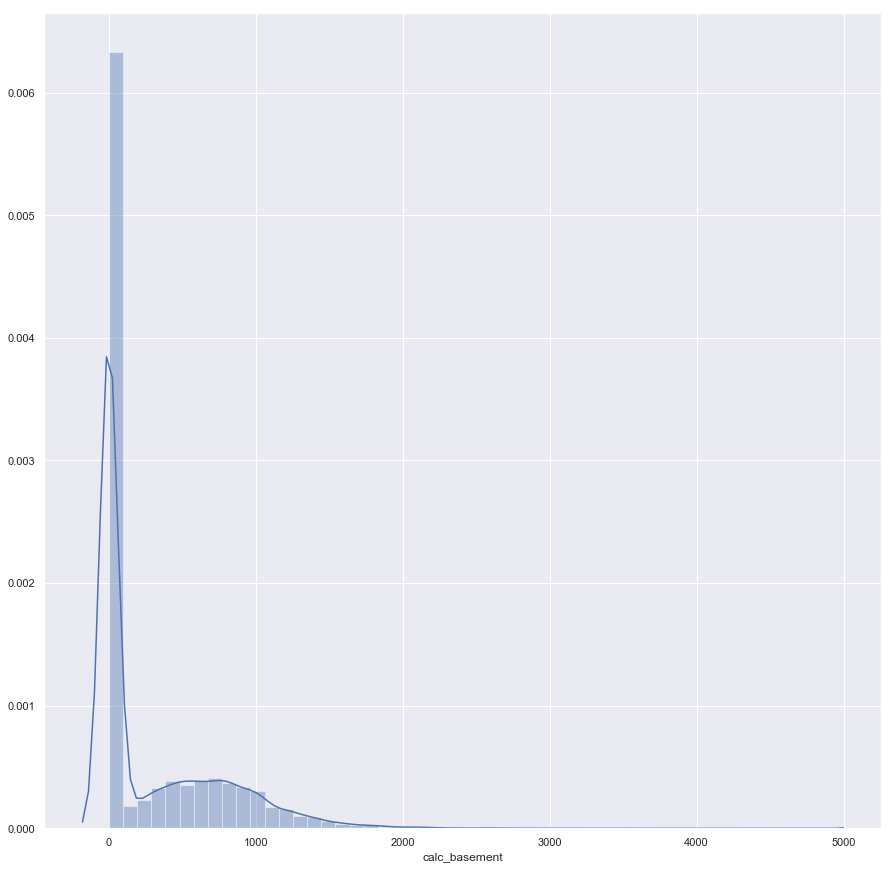

In [30]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(temp['calc_basement'])

In [31]:
conditions = [
    (temp['calc_basement'] == 0),
    (temp['calc_basement'] > 0) & (temp['calc_basement'] <= 300),
    (temp['calc_basement'] > 300) & (temp['calc_basement'] <= 600),
    (temp['calc_basement'] > 600) & (temp['calc_basement'] <= 1000),
    (temp['calc_basement'] > 1000) & (temp['calc_basement'] <= 5000),
    ]

In [32]:
values = ['level_1', 'level_2', 'level_3', 'level_4','level_5']

In [33]:
temp['basement_size'] = np.select(conditions, values)

In [34]:
temp.head()

,sqft_living,sqft_above,sqft_basement,calc_basement,basement_size
0,1180,1180,0.0,0,level_1
1,2570,2170,400.0,400,level_3
2,770,770,0.0,0,level_1
3,1960,1050,910.0,910,level_4
4,1680,1680,0.0,0,level_1


In [35]:
temp.basement_size.value_counts()

level_1    13110
level_4     3108
level_3     2357
level_5     1866
level_2     1156
Name: basement_size, dtype: int64

## Column for basement/no_basement using Numpy.where()

In [36]:
temp['has_basement'] = np.where(temp['calc_basement'] == 0, False, True)
temp.head()

,sqft_living,sqft_above,sqft_basement,calc_basement,basement_size,has_basement
0,1180,1180,0.0,0,level_1,False
1,2570,2170,400.0,400,level_3,True
2,770,770,0.0,0,level_1,False
3,1960,1050,910.0,910,level_4,True
4,1680,1680,0.0,0,level_1,False


# Floors

In [37]:
# Sorts by value
df.floors.value_counts(sort=True)

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [38]:
# Sort by index
df.floors.value_counts().sort_index()

1.0    10673
1.5     1910
2.0     8235
2.5      161
3.0      611
3.5        7
Name: floors, dtype: int64

## Half floors
A house that is 1.5 has the master bedroom on the first floor and the other bedrooms on the second floor.  A 2.5 story house has a steep roof line and dormers.  Presumably a 3.5 story house has three floors and then a steep roof and dormer.

In [39]:
df.floors.head(20)

0     1.0
1     2.0
2     1.0
3     1.0
4     1.0
5     1.0
6     2.0
7     1.0
8     1.0
9     2.0
10    1.0
11    1.0
12    1.5
13    1.0
14    1.5
15    2.0
16    2.0
17    1.5
18    1.0
19    1.0
Name: floors, dtype: float64

In [40]:
# Goal to combine floors
# if floor is 1.5 rename to 2
# if floor is 2.5 or 3.5 rename to 3

df.loc[df['floors'] == 1.5, 'floors'] = 2
df.loc[df['floors'] == 2.5, 'floors'] = 3
df.loc[df['floors'] == 3.5, 'floors'] = 3

In [41]:
df.floors.value_counts()

1.0    10673
2.0    10145
3.0      779
Name: floors, dtype: int64

## Result
I could have reused numpy.select() to change the values of 1.5, 2.5 and 3.5, but wanted to use a new technique.

## Yr_renovated

In [42]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [43]:
# null values: 3842
df.yr_renovated.isna().sum()

3842

In [44]:
# year and null: 4586
df[df['yr_renovated'] != 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,2.0,0.0,0.0,...,7,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,7,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,2.0,0.0,0.0,...,8,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,9,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
45,8035350320,7/18/2014,488000.0,3,2.50,3160,13603,2.0,0.0,0.0,...,8,3160,0.0,2003,NaN,98019,47.7443,-121.977,3050,9232
52,7518505990,12/31/2014,600000.0,3,1.75,1410,4080,1.0,0.0,0.0,...,7,1000,410.0,1950,NaN,98117,47.6808,-122.384,1410,4080


In [45]:
#null and year renovated + no renovation = total
4586+17011

21597

In [46]:
# total - no renovation - null = number of renovations
21597-17011-3842

744

In [47]:
# 17% of values are null, too much to drop
3842/21597

0.17789507802009538

In [48]:
# renovation to no-renovation ratio
744/17011

0.04373640585503498

## Nulls get bundled with values

In [49]:
# create new column, renovation, true or false value
# what will happen with nulls? 

# df['renovation'] = np.where(df['yr_renovated'] == 0, False, True)

In [50]:
# df.renovation.value_counts()
# Results:
# False 17011
# True   4586

In [51]:
# df['renovation'] = np.where(df['yr_renovated'] != 0, True, False)

In [52]:
# same result as above
# df.renovation.value_counts()

## The 3842 nulls get switched to 'not 0'

In [53]:
df['renovation'] = df['yr_renovated'].fillna(pd.Series(np.random.choice([999, 0], 
                                                      p=[744/17011, 1-(744/17011)], size=len(df))))

In [54]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0.0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0.0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0.0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0.0


In [55]:
df.renovation.value_counts()

0.0       20683
999.0       170
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1984.0       16
1998.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1997.0       12
1993.0       12
          ...  
1964.0        5
1975.0        5
1981.0        4
1973.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1959.0        1
1946.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1953.0        1
1948.0        1
1934.0        1
1976.0        1
1944.0        1
Name: renovation, Length

In [56]:
df.renovation.isna().sum()

0

In [57]:
round(0.96*3842 + 17011)

20699

In [58]:
# Removed nulls in the ratio of renovation/non-renovation, now change the column to bool
df['renovation'] = np.where(df['renovation'] == 0, False, True)

In [61]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,False


In [60]:
df.renovation.value_counts()

False    20683
True       914
Name: renovation, dtype: int64

## Result
A new column was created, the null values where filled in the correct ratio and then the column values where converted to a bool.